In [1]:
# Intitializatio
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# %load ml11.py
# Scale data (between 0 and 1)
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
# Separate into features and target
X = df.drop(columns=['class'])
y = df['class']
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
scaledX = scaler.transform(X)
# Check min and max of all column
print(f'minimum={np.min(scaledX, axis=0)}, maximum={np.max(scaledX, axis=0)}')

minimum=[0. 0. 0. 0. 0. 0. 0. 0.], maximum=[1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
# %load ml12.py
# Standardize data (0 mean, 1 stdev)
import numpy as np
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
# Separate into features and target
X = df.drop(columns=['class'])
y = df['class']
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
# Check mean and standard deviation of all columns
print(f'mean={np.mean(scaledX, axis=0)}, variance={np.var(scaledX, axis=0)}')


mean=[-6.47630098e-17 -9.25185854e-18  1.50342701e-17  1.00613962e-16
 -3.00685403e-17  2.59052039e-16  2.45174251e-16  1.93132547e-16], variance=[1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
# %load ml13.py
# Robust scaling (0 median, 1 IQR)
import numpy as np
from sklearn.preprocessing import RobustScaler
from pandas import read_csv
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
# Separate into features and target
X = df.drop(columns=['class'])
y = df['class']
scaler = RobustScaler()
scaledX = scaler.fit_transform(X)
# Check median and IQR of all columns
q3, q1 = np.percentile(scaledX, [75 ,25], axis=0)
print(f'median={np.median(scaledX, axis=0)}, IQR={q3-q1}')

median=[0. 0. 0. 0. 0. 0. 0. 0.], IQR=[1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

df = read_csv("data/rescale.csv")
df.head()

,feature1,feature2,label
0,-4.083310,-10963.008707,0
1,0.751363,-7153.781270,1
2,5.706203,-7830.473386,1
3,-6.522791,-9145.506169,0
4,-7.362259,2846.910782,2


In [9]:
df.describe()

,feature1,feature2,label
count,300.000000,300.000000,300.000000
mean,-3.112509,-5458.703355,1.000000
std,5.260577,5641.865215,0.817861
min,-14.482280,-14742.240961,0.000000
25%,-7.036305,-9750.407678,0.000000
50%,-4.439516,-7862.241840,1.000000
75%,1.833269,611.843991,2.000000
max,8.907468,6395.905063,2.000000


In [10]:
df.groupby("label").size()

label
0    100
1    100
2    100
dtype: int64

In [12]:
X = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = split(X, y, stratify=y, test_size=0.25, random_state=42)

knn1 = KNeighborsClassifier().fit(X_train, y_train)
print(f"knn1 accuracy: {knn1.score(X_test, y_test):.3%}")

knn1 accuracy: 69.333%


In [13]:
scl = MinMaxScaler()
Xs_train = scl.fit_transform(X_train)
Xs_test = scl.transform(X_test)

knn2 = KNeighborsClassifier().fit(Xs_train, y_train)
print(f"knn2 accuracy: {knn2.score(Xs_test, y_test):.3%}")

knn2 accuracy: 100.000%


In [15]:
# %load ml14.py
# Create 2 new features
import pandas as pd
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('data/pima-indians-diabetes.data.csv', names=header)
bins = [0, 30, 50, 100] 
labels = ['Young', 'Middle-aged', 'Senior']
df['new_feature1'] = pd.cut(df['age'], bins=bins, labels=labels)
df['new_feature2'] = df['mass'].rolling(window=3).mean()
print(df.head())


   preg  plas  pres  skin  test  mass   pedi  age  class new_feature1  \
0     6   148    72    35     0  33.6  0.627   50      1  Middle-aged   
1     1    85    66    29     0  26.6  0.351   31      0  Middle-aged   
2     8   183    64     0     0  23.3  0.672   32      1  Middle-aged   
3     1    89    66    23    94  28.1  0.167   21      0        Young   
4     0   137    40    35   168  43.1  2.288   33      1  Middle-aged   

   new_feature2  
0           NaN  
1           NaN  
2     27.833333  
3     26.000000  
4     31.500000  


In [17]:
# %load ml15.py
# Feature Selection with Univariate Selection
from pandas import read_csv
from sklearn.feature_selection import SelectKBest
# load data
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
selector = SelectKBest(k=4)
features = selector.fit_transform(X, y)
selected = selector.get_support()
# Show selected features
print([header[i] for i, j in enumerate(selected) if j])


['preg', 'plas', 'mass', 'age']


In [19]:
# %load ml16.py
# Model-based Feature Selection with Random Forest
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=names)
array = df.values
X = array[:, :-1]
y = array[:, -1]
selector = SelectFromModel(RandomForestClassifier(), threshold='median')
features = selector.fit_transform(X, y)
selected = selector.get_support()
# Show selected features
print([names[i] for i in range(len(names)-1) if selected[i]])


['plas', 'mass', 'pedi', 'age']


In [21]:
# %load ml17.py
# Feature Selection with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=4)
features = rfe.fit_transform(X, y)
selected = rfe.get_support()
# Show selected features
print([header[i] for i, j in enumerate(selected) if j])


['plas', 'pres', 'mass', 'pedi']


In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as split
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

X, y = load_breast_cancer(return_X_y=True)
X.shape

(569, 30)

In [ ]:
X_train, X_test, y_train, y_test = split(X, y, stratify=y, train_size=0.75, random_state=42)

dtc1 = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print(f"dtc1 accuracy: {dtc1.score(X_test, y_test):.3%}")

# Use RFE for feature selection
rfe = RFE(DecisionTreeClassifier(), n_features_to_select=10)
Xf_train = rfe.fit_transform(X_train, y_train)
Xf_test = rfe.transform(X_test)

dtc2 = DecisionTreeClassifier(random_state=42).fit(Xf_train, y_train)
print(f"dtc2 accuracy: {dtc2.score(Xf_test, y_test):.3%}")

In [27]:
# %load ml18.py
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
# Split into training and testing sets
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(f"Accuracy: {result:.2%}")


Accuracy: 70.08%


In [29]:
# %load ml19.py
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
# Split into training and testing sets
X_train, X_test, y_train, y_test = split(X, y, stratify=y, test_size=0.33, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(f"Accuracy: {result:.2%}")


Accuracy: 72.44%


In [31]:
# %load ml20.py
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
model = KNeighborsClassifier()
# Create 3 partitions
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
# Perform 3-fold cross-validation
results = cross_val_score(model, X, y, cv=kfold)
print(f"Accuracy: {results.mean():.2%} ({results.std():.2%})")


Accuracy: 72.14% (1.92%)


In [33]:
# Use stratified k-fold cross validation
from pandas import read_csv
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
model = KNeighborsClassifier()
# Create 3 partitions
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# Perform 3-fold cross-validation
results = cross_val_score(model, X, y, cv=kfold)
print(f"Accuracy: {results.mean():.2%} ({results.std():.2%})")

Accuracy: 70.18% (1.76%)


In [35]:
# %load ml21.py
# Linear Regression
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from pandas import read_csv
df = read_csv("data/real_estate_valuation_dataset.csv")
X = df.drop(columns=['House price of unit area'])
y = df['House price of unit area']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print(f'R2 score: {lr.score(X_test, y_test):.2f}')


R2 score: 0.58


In [37]:
# %load ml22.py
# k-NN Regressor
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsRegressor
from pandas import read_csv
df = read_csv("data/real_estate_valuation_dataset.csv")
X = df.drop(columns=['House price of unit area'])
y = df['House price of unit area']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
print(f'R2 score: {knn.score(X_test, y_test):.2f}')


R2 score: 0.61


In [39]:
# %load ml23.py
# Logistic Regression
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=names)
X = df.values[:,:-1]
y = df.values[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
lgr = LogisticRegression().fit(X_train, y_train)
print(f'Accuracy: {lgr.score(X_test, y_test):.2%}')

Accuracy: 72.92%


In [41]:
# %load ml24.py
# k-NN Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=names)
X = df.values[:,:-1]
y = df.values[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
knn = KNeighborsClassifier().fit(X_train, y_train)
print(f'Accuracy: {knn.score(X_test, y_test):.2%}')


Accuracy: 65.62%


In [43]:
# %load ml25.py
# Gaussian Naive Bayes Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.naive_bayes import GaussianNB
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=names)
X = df.values[:,:-1]
y = df.values[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
gnb = GaussianNB().fit(X_train, y_train)
print(f'Accuracy: {gnb.score(X_test, y_test):.2%}')


Accuracy: 73.44%


In [45]:
# %load ml26.py
# SVM Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.svm import SVC
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=names)
array = df.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
svc = SVC().fit(X_train, y_train)
print(f'Accuracy: {100 * svc.score(X_test, y_test):.2f} %')


Accuracy: 72.92 %


Train Accuracy: 100.00%
Test Accuracy: 70.83%


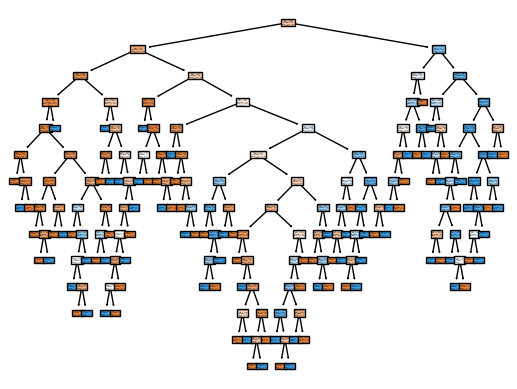

In [47]:
# %load ml27.py
# Decision Tree Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=names)
array = df.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
dtc = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print(f'Train Accuracy: {dtc.score(X_train, y_train):.2%}')
print(f'Test Accuracy: {dtc.score(X_test, y_test):.2%}')
plot_tree(dtc, feature_names=names[:-1], class_names=['0', '1'], filled=True)
plt.show()

Train accuracy: 76.22%
Test accuracy: 71.35%


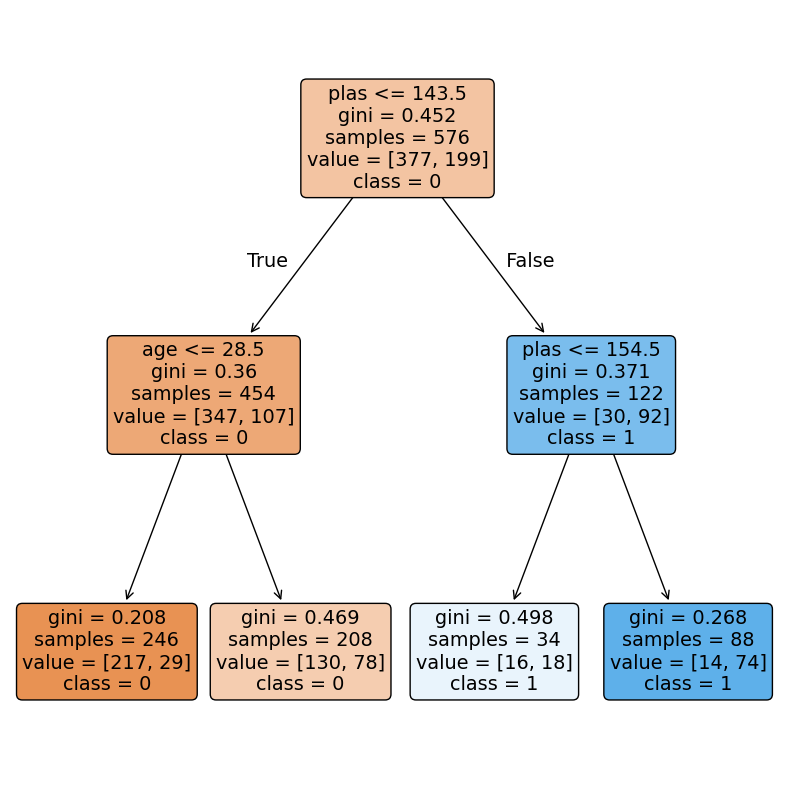

In [49]:
# %load ml28.py
# Decision Tree Classification with pre-pruning using max_depth
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
dtc = DecisionTreeClassifier(max_depth=2, random_state=42).fit(X_train, y_train)
print(f'Train accuracy: {dtc.score(X_train, y_train):.2%}')
print(f'Test accuracy: {dtc.score(X_test, y_test):.2%}')
# Plot decision tree
plt.figure(figsize=(10, 10))
plot_tree(dtc, feature_names=header, class_names=['0', '1'], rounded=True, filled=True)
plt.show()


In [52]:
# %load ml29.py
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.ensemble import RandomForestClassifier
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=names)
array = df.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(max_leaf_nodes=6, random_state=42).fit(X_train, y_train)
print(f'Accuracy: {rfc.score(X_test, y_test):.2%}')


Accuracy: 75.00%


In [54]:
# %load ml30.py
# Gradient Boosting Tree Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.ensemble import GradientBoostingClassifier
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=names)
array = df.values
X = array[:,:-1]
y = array[:,-1]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
gbc = GradientBoostingClassifier(max_depth=2, random_state=42).fit(X_train, y_train)
print(f'Accuracy: {gbc.score(X_test, y_test):.2%}')

Accuracy: 74.48%


In [2]:
# Train classification models for the Titanic dataset
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
cols = ["Pclass", "Gender", "Age", "SibSp", "Parch", "Fare", "Survived"]
df2 = df[cols]
df2.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [6]:
df2["Age"] = df2["Age"].fillna(df2["Age"].median())
df2.isna().sum()

C:\Users\wooihaw\AppData\Local\Temp\ipykernel_8348\3357906293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Age"] = df2["Age"].fillna(df2["Age"].median())


Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [8]:
df3 = pd.get_dummies(df2, columns=["Gender"], drop_first=True)
df3.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Gender_male
0,3,22.0,1,0,7.2500,0,True
1,1,38.0,1,0,71.2833,1,False
2,3,26.0,0,0,7.9250,1,False
3,1,35.0,1,0,53.1000,1,False
4,3,35.0,0,0,8.0500,0,True


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Age          891 non-null    float64
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Survived     891 non-null    int64  
 6   Gender_male  891 non-null    bool   
dtypes: bool(1), float64(2), int64(4)
memory usage: 42.8 KB


In [10]:
from sklearn.model_selection import train_test_split as split
# Separate into features and target
X = df3.drop(columns=["Survived"])
y = df3["Survived"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, stratify=y, random_state=42)

In [13]:
# Use spotchecking to quickly evaluate the performance of different ML algorithms
models = {}
models['knn'] = KNeighborsClassifier()
models['lgr'] = LogisticRegression()
models['svc'] = SVC()
models['dtc'] = DecisionTreeClassifier()
models['rfc'] = RandomForestClassifier()
models['gbc'] = GradientBoostingClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for m in models:
    scores = cross_val_score(models[m], X_train, y_train, cv=skf, n_jobs=-1)
    print(f"{m}: {scores.mean():.3%}, {scores.std():.3%}")

knn: 72.599%, 2.503%
lgr: 79.936%, 2.011%
svc: 69.758%, 2.526%
dtc: 77.256%, 3.428%
rfc: 82.039%, 1.207%
gbc: 83.530%, 0.866%


In [14]:
model = GradientBoostingClassifier().fit(X_train, y_train)
print(f"Model's accuracy: {model.score(X_test, y_test):.3%}")

Model's accuracy: 80.269%


In [18]:
Jack = [3, 21, 0, 0, 5, 1]
Rose = [1, 20, 0, 1, 50, 0]
model.predict([Jack, Rose])

C:\Users\wooihaw\Documents\Python_Venv\mlpy0724\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0, 1])